# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


Dataset yang digunakan berasal dari Kaggle:
https://www.kaggle.com/datasets/therohithanand/used-car-price-prediction

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# Library essential
import pandas as pd

# Library visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Library pre-processing data
from sklearn.preprocessing import LabelEncoder, StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('used_car_price_dataset_extended_raw.csv')
df.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,NaN,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,NaN,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# Set style seaborn agar tampilan lebih bagus
sns.set_style("whitegrid")

In [4]:
# Informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make_year           10000 non-null  int64  
 1   mileage_kmpl        10000 non-null  float64
 2   engine_cc           10000 non-null  int64  
 3   fuel_type           10000 non-null  object 
 4   owner_count         10000 non-null  int64  
 5   price_usd           10000 non-null  float64
 6   brand               10000 non-null  object 
 7   transmission        10000 non-null  object 
 8   color               10000 non-null  object 
 9   service_history     7962 non-null   object 
 10  accidents_reported  10000 non-null  int64  
 11  insurance_valid     10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


In [5]:
# Deskripsi lengkap dataset
df.describe(include="all")

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
count,10000.000000,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000,10000,10000,7962,10000.000000,10000
unique,NaN,NaN,NaN,3,NaN,NaN,10,2,6,2,NaN,2
top,NaN,NaN,NaN,Petrol,NaN,NaN,Nissan,Manual,Gray,Full,NaN,Yes
freq,NaN,NaN,NaN,4968,NaN,NaN,1089,5985,1705,4987,NaN,7934
mean,2009.206900,17.960753,2287.130000,NaN,3.003500,7179.754532,NaN,NaN,NaN,NaN,0.492200,NaN
std,8.373858,5.025486,1291.276927,NaN,1.418904,2795.270940,NaN,NaN,NaN,NaN,0.694109,NaN
min,1995.000000,5.000000,800.000000,NaN,1.000000,1000.000000,NaN,NaN,NaN,NaN,0.000000,NaN
25%,2002.000000,14.540000,1200.000000,NaN,2.000000,5176.547500,NaN,NaN,NaN,NaN,0.000000,NaN
50%,2009.000000,17.970000,1800.000000,NaN,3.000000,6961.260000,NaN,NaN,NaN,NaN,0.000000,NaN
75%,2016.000000,21.352500,3000.000000,NaN,4.000000,8993.732500,NaN,NaN,NaN,NaN,1.000000,NaN


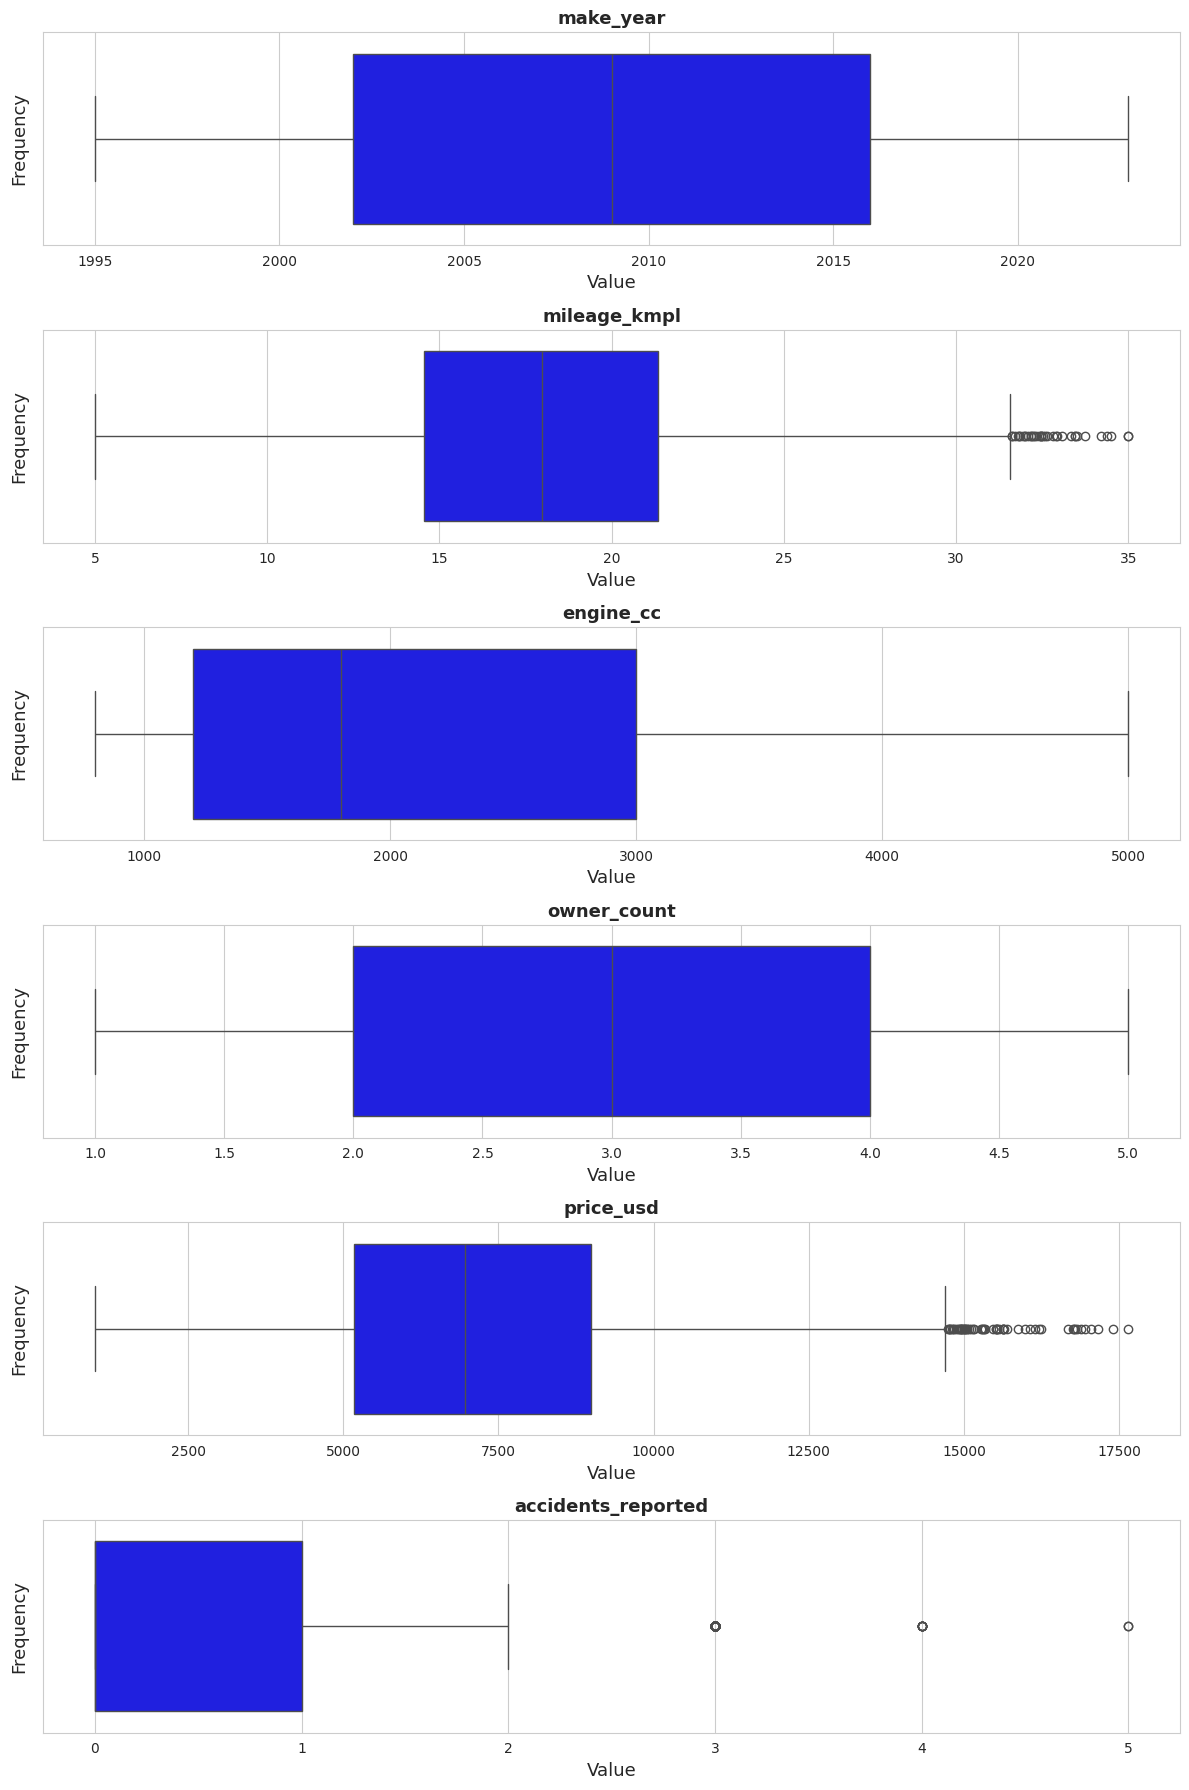

In [6]:
# Boxplot seluruh kolom numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_vars = len(numerical_cols)
n_cols = 1
n_rows = -(-num_vars // n_cols)

fig, axes = plt.subplots(n_rows, 1, figsize=(12, n_rows * 3))
axes = axes.flatten()

for i, column in enumerate(df[numerical_cols].columns):
    sns.boxplot(x=df[column], ax=axes[i], color='blue')
    axes[i].set_title(column, fontsize=13, weight='bold')
    axes[i].set_xlabel('Value', fontsize=13)
    axes[i].set_ylabel('Frequency', fontsize=13)

fig.tight_layout()
plt.show()

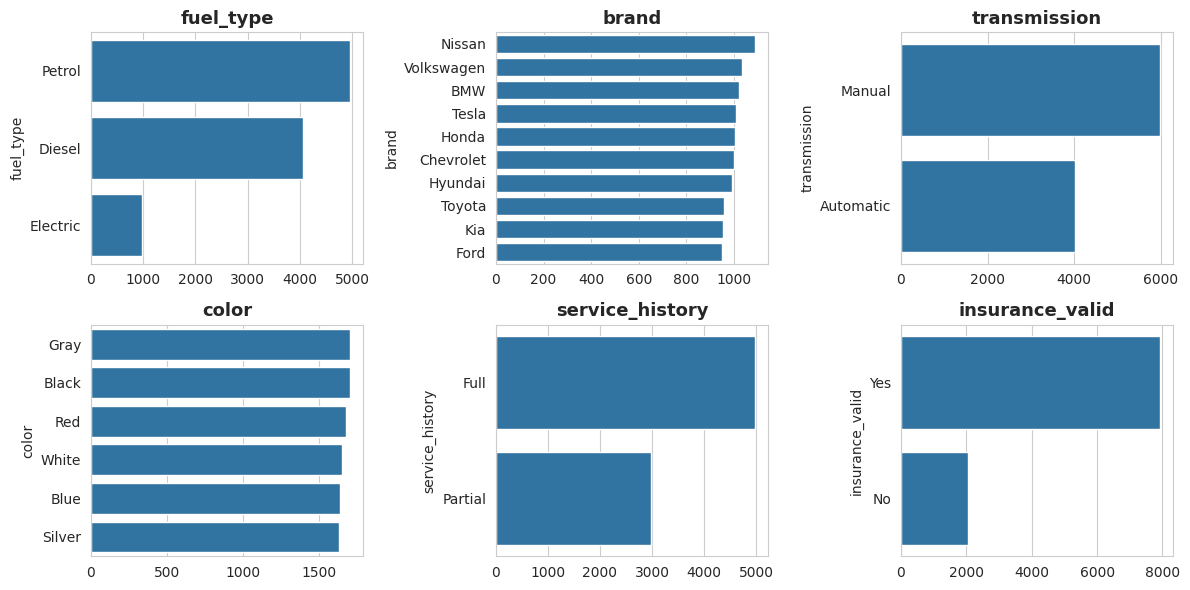

In [7]:
# Bar chart kolom kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns

num_vars = len(numerical_cols)
n_cols = 3
n_rows = -(-num_vars // n_cols)

fig, axes = plt.subplots(n_rows, 3, figsize=(12, n_rows * 3))
axes = axes.flatten()

for i, column in enumerate(df[categorical_cols].columns):
  data = df[column].value_counts()
  sns.barplot(x=data.values, y=data.index, ax=axes[i])
  axes[i].set_title(column, fontsize=13, weight='bold')

fig.tight_layout()
plt.show()

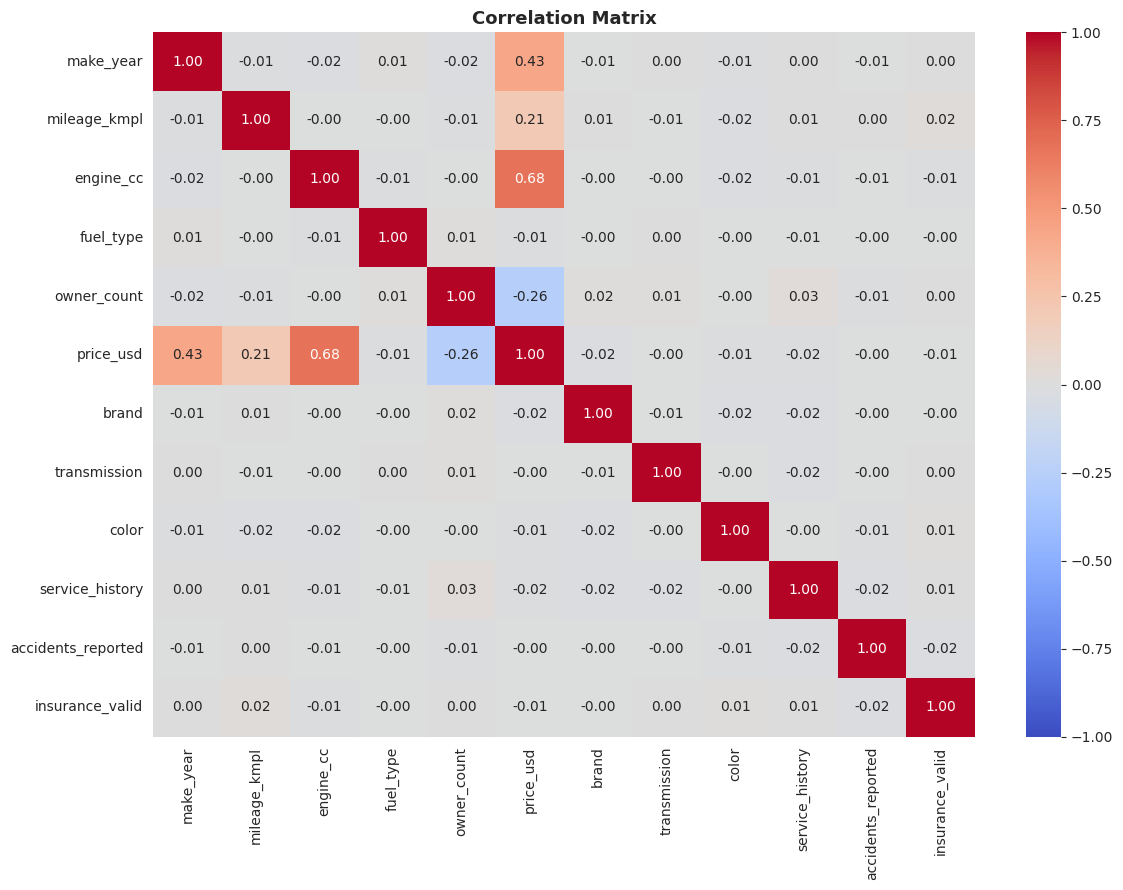

In [8]:
df_lencoder = df.copy()
categorical_cols = df.select_dtypes(include=['object']).columns

for column in df_lencoder[categorical_cols].columns:
  label_encoder = LabelEncoder()
  df_lencoder[column] = label_encoder.fit_transform(df_lencoder[column].astype(str))

correlation_matrix = df_lencoder.corr()

fig, ax = plt.subplots(1, 1, figsize=(12, 9))

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
ax.set_title('Correlation Matrix', fontsize=13, weight='bold')

fig.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isnull().sum()

,0
make_year,0
mileage_kmpl,0
engine_cc,0
fuel_type,0
owner_count,0
price_usd,0
brand,0
transmission,0
color,0
service_history,2038


In [11]:
df_preprocessed = df.copy()

# Ganti dari "NaN" jadi "No History" (field asli berisikan "None")
df_preprocessed['service_history'] = df_preprocessed['service_history'].fillna('No History')
df_preprocessed.isnull().sum()

,0
make_year,0
mileage_kmpl,0
engine_cc,0
fuel_type,0
owner_count,0
price_usd,0
brand,0
transmission,0
color,0
service_history,0


In [12]:
scaler = StandardScaler()
numerical_cols = ['make_year', 'mileage_kmpl', 'engine_cc', 'owner_count', 'price_usd']
df_preprocessed[numerical_cols] = scaler.fit_transform(df_preprocessed[numerical_cols])
df_preprocessed.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,-0.980111,-1.948317,1.326559,Petrol,0.702338,0.503692,Chevrolet,Manual,White,No History,0,No
1,0.572417,-0.073778,-0.609605,Petrol,0.702338,-0.442289,Honda,Manual,Black,No History,0,Yes
2,1.647244,0.025720,0.164861,Diesel,1.407142,0.749097,BMW,Automatic,Black,Full,1,Yes
3,-0.024709,-1.329441,-1.151732,Petrol,-1.412076,-0.122897,Hyundai,Manual,Blue,Full,0,Yes
4,-0.502410,-1.140395,-0.996838,Petrol,-0.707271,-0.913719,Nissan,Automatic,Red,Full,0,Yes


Drop fitur yang tidak berkorelasi tinggi dan hanya gunakan fitur yang berkorelasi dengan target untuk simplisitas proyek (proyek fokus pada sistem machine learning, bukan skor model ML)

In [13]:
df_selected = df_preprocessed[['make_year', 'mileage_kmpl', 'engine_cc', 'owner_count', 'price_usd']]
df_selected.head()

,make_year,mileage_kmpl,engine_cc,owner_count,price_usd
0,-0.980111,-1.948317,1.326559,0.702338,0.503692
1,0.572417,-0.073778,-0.609605,0.702338,-0.442289
2,1.647244,0.025720,0.164861,1.407142,0.749097
3,-0.024709,-1.329441,-1.151732,-1.412076,-0.122897
4,-0.502410,-1.140395,-0.996838,-0.707271,-0.913719


In [14]:
df_selected.to_csv("used_car_price_dataset_extended_preprocessing.csv")